In [14]:
import pandas as pd
import numpy as np
import textblob

In [15]:
text = pd.read_csv("train.csv")
text.head()

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [16]:
text.sample(10)

,Insult,Date,Comment
3661,0,NaN,"""The reason most people are gay is because the..."
913,1,20120609164746Z,"""You act like you faced a good team. You playe..."
2111,1,20120502101915Z,"""Get I life u bitch!!!\navande ammede oru lekh..."
3835,0,20120620002207Z,"""Or you could have just used your phone as you..."
1507,0,20120609204301Z,"""Having a high intelligence is also generally ..."
3521,0,NaN,"""Great idea!\\xc2\\xa0 Who the hell empowered ..."
1698,0,20120612001413Z,"""I just can't imagine what took the Justice De..."
1391,0,20120611194257Z,"""not funny dude....but I get it."""
2907,0,20120609175337Z,"""Obama commands the lead in under 36k a year a..."
1844,0,NaN,"""Video: Breitbart vs. Cenk Uygar over rape at ..."


In [17]:
test = pd.read_csv("test.csv") # used later for evaluation
test.head()

,Insult,Date,Comment,Usage
0,0,NaN,"""THE DRUDGE REPORT\\n\\n\\n\\nYou won't see th...",PublicTest
1,0,20120618222256Z,"""@ian21\xa0""Roger Clemens is the fucking man, ...",PublicTest
2,1,20120618213617Z,"""Agree with Alan you are an extremest idiot. ...",PublicTest
3,0,NaN,"""Really?\\n\\nI see Marc Lamont Hill on variou...",PrivateTest
4,0,20120620003825Z,"""Really suck isn't the word, when many of our ...",PrivateTest


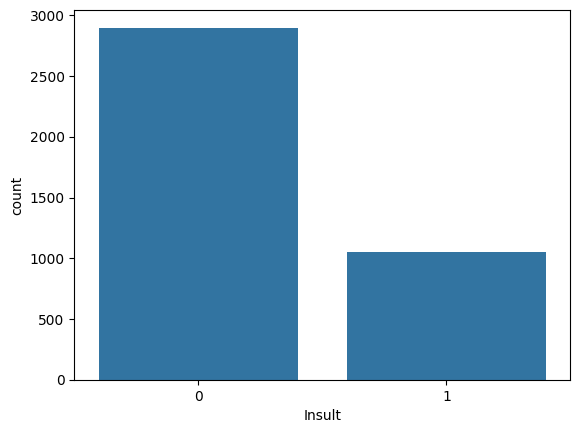

In [18]:
import seaborn as sns
sns.countplot(x = "Insult", data = text)
prevalence = sum(text["Insult"]) / len(text["Insult"])

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vectorizer = CountVectorizer(analyzer='word', max_features = 500, stop_words="english") # We'll just get the 500 most common words
X2 = vectorizer.fit_transform(text["Comment"])
test_set = vectorizer.transform(test["Comment"]) # for later

In [21]:
top500 = pd.DataFrame(data=X2.toarray(),
columns=vectorizer.get_feature_names_out())
top500_test = pd.DataFrame(data=test_set.toarray(), columns=vectorizer.get_feature_names_out()) # for later

In [22]:
text["sentiment"] = text.Comment.apply(lambda x: textblob.TextBlob(x).sentiment.polarity)
text["subjectivity"] = text.Comment.apply(lambda x: textblob.TextBlob(x).sentiment.subjectivity)
text["You"] = text["Comment"].str.lower().str.contains("you")
text["You"] = np.where(text["You"], 1, 0)
text["Length"] = text.Comment.apply(lambda x: len(x))
# We do this similarly for the test set as well


In [23]:
text["sentiment"] = text.Comment.apply(lambda x: textblob.TextBlob(x).sentiment.polarity)
text["subjectivity"] = text.Comment.apply(lambda x: textblob.TextBlob(x).sentiment.subjectivity)
text["You"] = text["Comment"].str.lower().str.contains("you")
text["You"] = np.where(text["You"], 1, 0)
text["Length"] = text.Comment.apply(lambda x: len(x))
# We do this similarly for the test set as well

In [24]:
test["sentiment"] = test.Comment.apply(lambda x: textblob.TextBlob(x).sentiment.polarity)
test["subjectivity"] = test.Comment.apply(lambda x: textblob.TextBlob(x).sentiment.subjectivity)
test["You"] = test["Comment"].str.lower().str.contains("you")
test["You"] = np.where(test["You"], 1, 0)
test["Length"] = test.Comment.apply(lambda x: len(x))
# We do this similarly for the test set as well

In [25]:
full = pd.concat([text, top500], axis=1)
full


,Insult,Date,Comment,sentiment,subjectivity,You,Length,000,10,2012,...,xe2,xe4r,ya,yeah,year,years,yes,yo,young,youtube
0,1,20120618192155Z,"""You fuck your dad.""",-0.400000,0.600000,1,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ...",0.200000,0.200000,1,92,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ...",0.170000,0.890000,1,390,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,NaN,"""listen if you dont wanna get married to a man...",0.370000,0.516667,1,271,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd...",0.000000,0.000000,0,728,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3942,1,20120502172717Z,"""you are both morons and that is never happening""",-0.800000,1.000000,1,49,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3943,0,20120528164814Z,"""Many toolbars include spell check, like Yahoo...",0.500000,0.500000,1,145,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3944,0,20120620142813Z,"""@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F...",0.000000,0.000000,0,160,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3945,0,20120528205648Z,"""How about Felix? He is sure turning into one ...",0.114815,0.425926,0,184,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
test_full = pd.concat([test, top500_test], axis=1)
test_full

,Insult,Date,Comment,Usage,sentiment,subjectivity,You,Length,000,10,...,xe2,xe4r,ya,yeah,year,years,yes,yo,young,youtube
0,0,NaN,"""THE DRUDGE REPORT\\n\\n\\n\\nYou won't see th...",PublicTest,0.141875,0.435417,1,2802,0,0,...,19,0,0,0,0,0,0,0,0,0
1,0,20120618222256Z,"""@ian21\xa0""Roger Clemens is the fucking man, ...",PublicTest,-0.066667,0.866667,1,177,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,20120618213617Z,"""Agree with Alan you are an extremest idiot. ...",PublicTest,-0.350000,0.516667,1,111,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,NaN,"""Really?\\n\\nI see Marc Lamont Hill on variou...",PrivateTest,-0.055556,0.444444,1,234,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,20120620003825Z,"""Really suck isn't the word, when many of our ...",PrivateTest,0.103889,0.597778,0,197,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,0,20120612003508Z,"""Never really gave it much thought. I just fig...",PrivateTest,0.033333,0.133333,0,74,0,0,...,0,0,0,0,0,0,0,0,0,0
2643,0,20120619210456Z,"""Nadie se salva de la regla 34 xd""",PrivateTest,0.000000,0.000000,0,34,0,0,...,0,0,0,0,0,0,0,0,0,0
2644,0,20120528234613Z,"""Question: Are you a boy or a girl?""",PrivateTest,0.000000,0.000000,1,36,0,0,...,0,0,0,0,0,0,0,0,0,0
2645,1,20120619153537Z,"""Leave your email or phone number and maybe yo...",PrivateTest,-0.022778,0.601667,1,256,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Train Set
X = full.drop(columns=['Insult', 'Date', 'Comment'])
y = text["Insult"]

In [28]:
test_full

,Insult,Date,Comment,Usage,sentiment,subjectivity,You,Length,000,10,...,xe2,xe4r,ya,yeah,year,years,yes,yo,young,youtube
0,0,NaN,"""THE DRUDGE REPORT\\n\\n\\n\\nYou won't see th...",PublicTest,0.141875,0.435417,1,2802,0,0,...,19,0,0,0,0,0,0,0,0,0
1,0,20120618222256Z,"""@ian21\xa0""Roger Clemens is the fucking man, ...",PublicTest,-0.066667,0.866667,1,177,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,20120618213617Z,"""Agree with Alan you are an extremest idiot. ...",PublicTest,-0.350000,0.516667,1,111,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,NaN,"""Really?\\n\\nI see Marc Lamont Hill on variou...",PrivateTest,-0.055556,0.444444,1,234,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,20120620003825Z,"""Really suck isn't the word, when many of our ...",PrivateTest,0.103889,0.597778,0,197,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642,0,20120612003508Z,"""Never really gave it much thought. I just fig...",PrivateTest,0.033333,0.133333,0,74,0,0,...,0,0,0,0,0,0,0,0,0,0
2643,0,20120619210456Z,"""Nadie se salva de la regla 34 xd""",PrivateTest,0.000000,0.000000,0,34,0,0,...,0,0,0,0,0,0,0,0,0,0
2644,0,20120528234613Z,"""Question: Are you a boy or a girl?""",PrivateTest,0.000000,0.000000,1,36,0,0,...,0,0,0,0,0,0,0,0,0,0
2645,1,20120619153537Z,"""Leave your email or phone number and maybe yo...",PrivateTest,-0.022778,0.601667,1,256,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Test Set
X_test = test_full.drop(["Insult", "Date", "Comment", "Usage"], axis=1)
y_test = test["Insult"]

In [30]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

param_grid = [
{'n_estimators': np.arange(1, 1000),
'max_features': np.arange(100,500),
'max_depth': np.arange(30, 150),
'max_samples': np.arange(1000,2500),
'max_leaf_nodes': np.arange(10, 500),
'min_samples_split' : np.arange(2, 50),
'min_weight_fraction_leaf' : np.arange(0, 0.5)
}]
rf_clf = RandomForestClassifier(random_state=42)
grid_search = RandomizedSearchCV(rf_clf, param_grid, n_iter = 8, cv=5,scoring='neg_mean_squared_error', random_state = 42, return_train_score=True)
grid_search.fit(X.values, y)
forest_model = grid_search.best_estimator_
forest_model

RandomForestClassifier(max_depth=144, max_features=182, max_leaf_nodes=160,
                       max_samples=1630, min_samples_split=38, n_estimators=665,
                       random_state=42)

In [31]:
RandomForestClassifier(max_depth=144, max_features=182, max_leaf_nodes=160,
                       max_samples=1630, min_samples_split=38, n_estimators=665,
                       random_state=42)

RandomForestClassifier(max_depth=144, max_features=182, max_leaf_nodes=160,
                       max_samples=1630, min_samples_split=38, n_estimators=665,
                       random_state=42)

In [32]:
pred = forest_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test,pred))

/Users/hee/git/metaverse_patrol/metaverse/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.8273517189270873


In [33]:
import pickle 
with open('forest_model.pickle', 'wb') as f: 
    model = pickle.dump(forest_model, f)

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1)
print("AUC:", auc(fpr, tpr))
print("Accuracy:", accuracy_score(y_test,pred))
print("Recall:", recall_score(y_test, pred))
print("Precision Score:", precision_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred))

AUC: 0.7219574750280994
Accuracy: 0.8273517189270873
Recall: 0.5007215007215007
Precision Score: 0.75764192139738
F1 Score: 0.6029539530842745


In [35]:
import pickle 
with open('/Users/hee/git/metaverse_patrol/model/forest_model.pickle', 'rb') as f: 
    model = pickle.load(f)

In [36]:
insult = "When is the first kiss?"
lst = [0] * 504
lst[0] = textblob.TextBlob(insult).sentiment.polarity
lst[1] = textblob.TextBlob(insult).sentiment.subjectivity
lst[2] = int(np.where(insult.lower().__contains__("you"), 1, 0))
lst[3] = len(insult)

In [37]:
# lst[indexofbad] = 1
lst = np.array(lst)
insult_transformed = lst.reshape(1, -1)
model.predict(insult_transformed)[0]

0